In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

Now we're going to see how the "black-box" stuff in tensorflow works. This is more designed around data science type aplications, so it's limited for when we employ PINNs approaches. Nonetheless, we can see how some of the functionality works in a simple example. We will focus on a simple interpolation problem with synthetic data. First, we'll make it using the random number generation package. We take random data points and our output will be x^3 + normal noise. 

In [2]:
data_length = 500
x_data = tf.random.uniform([data_length,1],minval=-1,maxval=1)
y_data = x_data**3 + tf.random.normal([data_length,1],mean=0,stddev=0.05)

Making a fully connected, feed forward neural network is very simple. We define the inputs, the intermediate layers, and the model as follows. There are a wide range of black-box layers available in the tensorflow documentation. We'll keep it simple with dense, fully-connected layers. 

In [3]:
inputs = tf.keras.Input(shape=(1,))
x = tf.keras.layers.Dense(20, activation='relu')(inputs)
x = tf.keras.layers.Dense(20, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

Once the model has been defined, we can use it like any other function, e.g., to see its output on the data

In [4]:
model(x_data[0:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-0.06622422],
       [ 0.00251949],
       [-0.01196396],
       [ 0.04880974],
       [ 0.00196815],
       [ 0.02381438],
       [ 0.01703472],
       [-0.22817266],
       [-0.18696855],
       [ 0.05568435]], dtype=float32)>

To train the model, we need to specify the optimiser and loss, then compile. "mse" is a default (mean-squared error). tf.keras.optimizers has a large number of black-box optimisers

In [5]:
loss = "mse"
opt = tf.keras.optimizers.Adam(learning_rate=10**-2)
model.compile(optimizer = opt, loss = loss)

Training is then straightforward, we use model.fit, specifying the training and validation data, number of iterations, etc. 

In [12]:
history = model.fit(x=x_data,
                    y=y_data,
                    validation_split = 0.1,
                    epochs = 10,
                    batch_size=10)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0041 - val_loss: 0.0028
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - val_loss: 0.0034
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030 - val_loss: 0.0039
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - val_loss: 0.0052
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - val_loss: 0.0049
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - val_loss: 0.0032


We can plot the result to see what it looks like 

<function matplotlib.pyplot.show(close=None, block=None)>

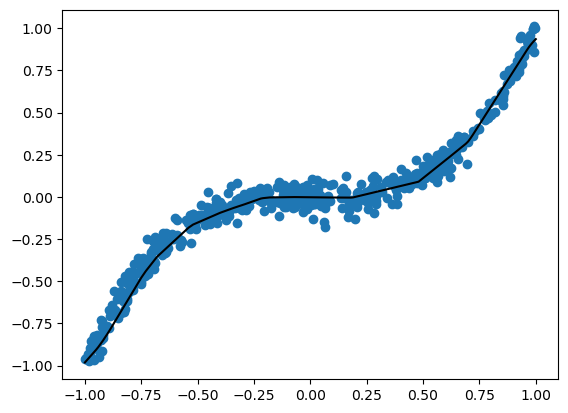

In [7]:
plt.scatter(x_data,y_data)

x_plot = tf.constant([[i/100] for i in range(-100,101)])

plt.plot(x_plot,model(x_plot),"k")
plt.show

We used history = model.fit(XXX). "history" now contains informatiton about the training, most importantly, the training and validation loss at each iteration. history.history is a dictionary, and "loss", "val_loss" contain these lists. 

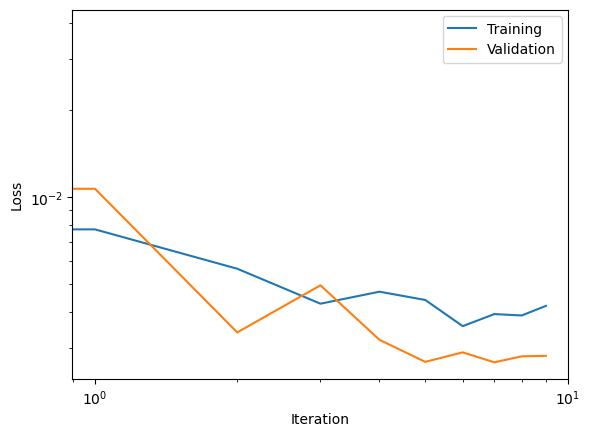

In [11]:
loss_list = history.history["loss"]
val_list = history.history["val_loss"]

plt.plot(loss_list,label="Training")
plt.plot(val_list,label="Validation")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

One important feature is "callbacks". There are many black-box ones that can be used, and they allow further functionality beyond just training. I'll use a single one, just to show how they work. EarlyStopping ends training if a given metric doesn't improve, and can restore the best obtained weights in this case. 

In [13]:
callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    restore_best_weights=True
)]

We train again (Note: We start from the previously obtained model, which is already "good"). 

In [14]:
history = model.fit(x=x_data,
                    y=y_data,
                    validation_split = 0.1,
                    epochs = 10,
                    batch_size=10,
                   callbacks = callbacks)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038 - val_loss: 0.0039


Tensorflow has a huge amount of layers, losses, callbacks and so forth. You can also define your own custom layers, losses and callbacks. A lot of this functionality is difficult to adapt to PINNs-type frameworks, so we will have to open the black box to get it to work how we want